In [18]:
import pandas as pd

In [19]:
from var_model.preprocessing import ts_differencing, undo_ts_differencing, adf_test

# Test all TS if stationary

## Test prsa data

In [20]:
df_prsa_data= pd.read_csv("../data/02_preprocessed/PRSA_DATA.csv")

In [21]:
df_prsa_data.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
0,2010,1,1,0,98.613215,-21,-11.0,1021.0,1.79,0,0
1,2010,1,1,1,98.613215,-21,-12.0,1020.0,4.92,0,0
2,2010,1,1,2,98.613215,-21,-11.0,1019.0,6.71,0,0
3,2010,1,1,3,98.613215,-21,-14.0,1019.0,9.84,0,0
4,2010,1,1,4,98.613215,-20,-12.0,1018.0,12.97,0,0


In [22]:
prsa_data_cols = ["pm2.5","DEWP","TEMP","PRES","Iws","Is","Ir"]

In [23]:
df_prsa_data = df_prsa_data[prsa_data_cols]

In [24]:
adf_test(df_prsa_data)

Augmented Dickey-Fuller Test: pm2.5
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: DEWP
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: TEMP
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: PRES
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: Iws
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: Is
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: Ir
Data has no unit root and is stationary


## Test air quality data

In [25]:
df_air_quality = pd.read_csv("../data/02_preprocessed/AirQualityUCI_preprocessed.csv")

In [26]:
df_air_quality.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [27]:
df_air_quality.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04/04/2005,10.00.00,3.1,1314.0,275.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,275.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,275.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,275.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,04/04/2005,14.00.00,2.2,1071.0,275.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


<AxesSubplot: >

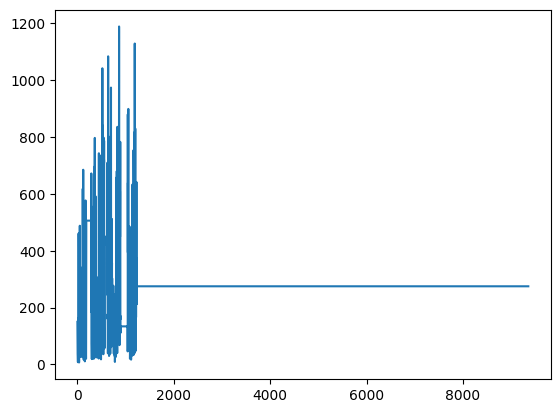

In [28]:
df_air_quality["NMHC(GT)"].plot()

NMHC(GT) column is constant after time. Every forecasting should be independent on other variables. We have to discard this column

In [29]:
air_quality_cols = [col for col in df_air_quality if col not in  {"Date","Time", "NMHC(GT)"}]

In [30]:
df_air_quality = df_air_quality[air_quality_cols]

In [31]:
adf_test(df_air_quality)

Augmented Dickey-Fuller Test: CO(GT)
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: PT08.S1(CO)
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: C6H6(GT)
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: PT08.S2(NMHC)
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: NOx(GT)
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: PT08.S3(NOx)
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: NO2(GT)
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: PT08.S4(NO2)
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: PT08.S5(O3)
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: T
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: RH
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: AH
Data has no unit root and is stationary


## Test metro interstate traffic data

In [32]:
df_metro_interstate = pd.read_csv("../data/02_preprocessed/Metro_Interstate_Traffic_Volume_preprocessed.csv")

In [33]:
df_metro_interstate.head()

,temp,rain_1h,snow_1h,clouds_all,date_time,traffic_volume
0,288.28,0.0,0.0,40,2012-10-02 09:00:00,5545
1,289.36,0.0,0.0,75,2012-10-02 10:00:00,4516
2,289.58,0.0,0.0,90,2012-10-02 11:00:00,4767
3,290.13,0.0,0.0,90,2012-10-02 12:00:00,5026
4,291.14,0.0,0.0,75,2012-10-02 13:00:00,4918


In [34]:
metro_interstate_cols = [col for col in df_metro_interstate.columns if not col.startswith("date")]

In [35]:
df_metro_interstate = df_metro_interstate[metro_interstate_cols]

In [36]:
adf_test(df_metro_interstate)

Augmented Dickey-Fuller Test: temp
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: rain_1h
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: snow_1h
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: clouds_all
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: traffic_volume
Data has no unit root and is stationary


## Test Sensor data

In [37]:
df_sensor= pd.read_csv("../data/02_preprocessed/sensor_data_preprocessed.csv")

In [38]:
df_sensor.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9


In [39]:
adf_test(df_sensor)

Augmented Dickey-Fuller Test: Appliances
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: lights
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: T1
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: RH_1
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: T2
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: RH_2
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: T3
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: RH_3
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: T4
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: RH_4
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: T5
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: RH_5
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: T6
Data has no unit root and is stationary
Augmented Dickey-Fuller Test:

In [40]:
df_sensor_diff = ts_differencing(df_sensor)

In [41]:
adf_test(df_sensor_diff)

Augmented Dickey-Fuller Test: Appliances
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: lights
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: T1
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: RH_1
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: T2
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: RH_2
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: T3
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: RH_3
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: T4
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: RH_4
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: T5
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: RH_5
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: T6
Data has no unit root and is stationary
Augmented Dickey-Fuller Test:

# Train Test Split
80/20 split

## Train/Test prsa data

In [42]:
split_prsa = int(df_prsa_data.shape[0] * 0.8)

In [43]:
df_prsa_data.iloc[:split_prsa].shape[0] + df_prsa_data.iloc[split_prsa:].shape[0] == df_prsa_data.shape[0]

True

In [44]:
df_prsa_data_train = df_prsa_data.iloc[:split_prsa].copy()
df_prsa_data_test = df_prsa_data.iloc[split_prsa:].copy()

In [45]:
df_prsa_data_train.to_csv("../data/03_model_input/prsa_train.csv", index = False)
df_prsa_data_test.to_csv("../data/03_model_input/prsa_test.csv", index = False)

## Train/Test airquality

In [46]:
split_air_quality = int(df_air_quality.shape[0] * 0.8)

In [47]:
df_air_quality.iloc[:split_air_quality].shape[0] + df_air_quality.iloc[split_air_quality:].shape[0] == df_air_quality.shape[0]

True

In [48]:
df_air_quality_train = df_air_quality.iloc[:split_air_quality].copy()
df_air_quality_test = df_air_quality.iloc[split_air_quality:].copy()

In [49]:
df_air_quality_train.to_csv("../data/03_model_input/air_quality_train.csv", index = False)
df_air_quality_test.to_csv("../data/03_model_input/air_quality_test.csv", index = False)

## Train/test metro_interstate

##

In [50]:
split_metro_interstate = int(df_metro_interstate.shape[0] * 0.8)

In [51]:
df_metro_interstate.iloc[:split_metro_interstate].shape[0] + df_metro_interstate.iloc[split_metro_interstate:].shape[0] == df_metro_interstate.shape[0]

True

In [52]:
df_metro_interstate_train = df_metro_interstate.iloc[:split_prsa].copy()
df_metro_interstate_test = df_metro_interstate.iloc[split_prsa:].copy()

In [53]:
df_metro_interstate_train.to_csv("../data/03_model_input/metro_interstate_train.csv", index = False)
df_metro_interstate_test.to_csv("../data/03_model_input/metro_interstate_test.csv", index = False)

## Train/Test Sensor

In [54]:
split_sensor = int(df_sensor_diff.shape[0] * 0.8)

In [55]:
df_sensor_diff.iloc[:split_sensor].shape[0] + df_sensor_diff.iloc[split_sensor:].shape[0] == df_sensor_diff.shape[0]

True

In [56]:
df_sensor_diff_train = df_sensor_diff.iloc[:split_sensor].copy()
df_sensor_diff_test = df_sensor_diff.iloc[split_sensor:].copy()

In [57]:
df_sensor_diff_train.to_csv("../data/03_model_input/sensor_train.csv", index = False)
df_sensor_diff_test.to_csv("../data/03_model_input/sensor_test.csv", index = False)

## 